# Bayesian learning for Hidden Markov Model

This tutorial illustrates training a Bayesian HMM using *Turing*. The main goals are learning transition matrix, emission parameter and hidden states in the Bayesian HMM model.

In [70]:
using Turing, Plots

In [71]:
y = [ 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0 ];
N = length(y);  K = 3;

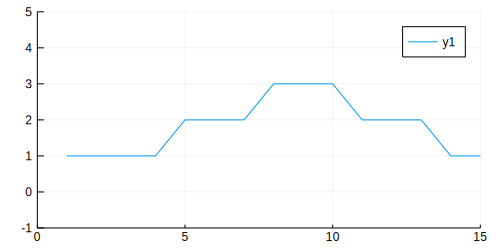

In [72]:
plot(y, xlim = (0,15), ylim = (-1,5), size = (500, 250))

In [76]:
@model BayesHmm(y) = begin
    s = tzeros(Int, N)
    m = Vector{Real}(undef, K)
    T = Vector{Vector{Real}}(undef, K)
    for i = 1:K
        T[i] ~ Dirichlet(ones(K)/K)
        # m[i] ~ Normal(1, 0.1) # Defining m this way causes label-switching problem.
        m[i] ~ Normal(i+1, 0.01)
    end
    s[1] ~ Categorical(ones(Float64, K)/K)
    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i]], 0.4)
    end
    return(s, m)
end

BayesHmm (generic function with 2 methods)

In [77]:
g = Gibbs(500, HMC(1, 0.2, 3, :m, :T), PG(10, 1, :s))
c = sample(BayesHmm(y), g);

┌ Info:  Assume - `T` is a parameter
└ @ Turing /Users/hg344/.julia/dev/Turing/src/core/compiler.jl:165
┌ Info:  Assume - `m` is a parameter (ignoring `m` found in global scope)
└ @ Turing /Users/hg344/.julia/dev/Turing/src/core/compiler.jl:165
┌ Info:  Assume - `s` is a parameter (ignoring `s` found in global scope)
└ @ Turing /Users/hg344/.julia/dev/Turing/src/core/compiler.jl:165
┌ Info:  Observe - `y` is an observation
└ @ Turing /Users/hg344/.julia/dev/Turing/src/core/compiler.jl:153
[Gibbs] Sampling...100% Time: 0:00:11
┌ Info: [Gibbs] Finished with
└ @ Turing /Users/hg344/.julia/dev/Turing/src/samplers/gibbs.jl:163
┌ Info:   Running time    = 10.925082965000001;
└ @ Turing /Users/hg344/.julia/dev/Turing/src/samplers/gibbs.jl:164


In [80]:
# Import StatsPlots for animating purposes.
using StatPlots

# Iterate through 100 MCMC samples.
Ns = 0:100;

# Make an animation.
animation = @gif for (i, N) in enumerate(Ns)
    
    ii = 4*i+90;
    m = c[:m][ii]; s = c[:s][ii];
    p = plot(y, c = :red,
        size = (500, 250), 
        xlabel = "Time", 
        ylabel = "State", 
        legend = legend = :topright, label = "True data",
        xlim = (0,15),
        ylim = (-1,5)); 
    plot!(p, m[s], c = :blue, label = "Sample $ii")
end;

┌ Info: Saved animation to 
│   fn = /Users/hg344/Documents/TuringLang/TuringTutorials/tmp.gif
└ @ Plots /Users/hg344/.julia/packages/Plots/UtVfv/src/animation.jl:90


![animation](https://user-images.githubusercontent.com/3279477/46320517-b0854f80-c5d6-11e8-89f5-693e11bee169.gif)